# Libraries

In [1]:
import pandas as pd

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [3]:
from fastai import *
from fastbook import *
from fastai.vision.all import *
from fastai.vision.widgets import *

In [4]:
!nvidia-smi

Thu Sep 14 02:36:50 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 537.34                 Driver Version: 537.34       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1660 ...  WDDM  | 00000000:26:00.0  On |                  N/A |
| 55%   46C    P8              19W / 125W |    838MiB /  6144MiB |      6%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
import torch

print("CUDA Available:", torch.cuda.is_available())
print("Number of CUDA devices:", torch.cuda.device_count())
print("Current CUDA device:", torch.cuda.current_device())


CUDA Available: True
Number of CUDA devices: 1
Current CUDA device: 0


# Cleaning

In [63]:
import os
import shutil

def clean_directory(path):
    # Iterate over all the directories in the given path
    for folder_name in os.listdir(path):
        folder_path = os.path.join(path, folder_name)

        # If it's a directory
        if os.path.isdir(folder_path):
            # If directory is empty, remove it
            if not os.listdir(folder_path):
                print(f"Removing empty directory: {folder_path}")
                shutil.rmtree(folder_path)
            else:
                # Replace spaces and apostrophes in the folder name with underscores
                new_folder_name = folder_name.replace(' ', '_').replace("'", "_")
                if new_folder_name != folder_name:
                    new_folder_path = os.path.join(path, new_folder_name)
                    print(f"Renaming directory from {folder_path} to {new_folder_path}")
                    os.rename(folder_path, new_folder_path)

# Usage
clean_directory('Images')


In [5]:
import os
import shutil

def clean_directory(path):
    labels = []
    # Iterate over all the directories in the given path
    for folder_name in os.listdir(path):
        folder_path = os.path.join(path, folder_name)

        # If it's a directory
        if os.path.isdir(folder_path):
            # If directory is empty, remove it
            if not os.listdir(folder_path):
                print(f"Removing empty directory: {folder_path}")
                shutil.rmtree(folder_path)
            else:
                # Replace spaces and apostrophes in the folder name with underscores
                new_folder_name = folder_name.replace(' ', '_').replace("'", "_")
                if new_folder_name != folder_name:
                    new_folder_path = os.path.join(path, new_folder_name)
                    print(f"Renaming directory from {folder_path} to {new_folder_path}")
                    os.rename(folder_path, new_folder_path)
                # Add the cleaned folder name to the labels list
                labels.append(new_folder_name)
    return labels

# Usage
food_labels = clean_directory('dataset\output')
print(food_labels)
print(len(food_labels))


['adhirasam', 'aloo_gobi', 'aloo_matar', 'aloo_methi', 'aloo_shimla_mirch', 'aloo_tikki', 'anarsa', 'apple_pie', 'ariselu', 'baby_back_ribs', 'Baden_Brägele_with_Bibliskäs', 'baklava', 'bandar_laddu', 'basundi', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bhatura', 'bhindi_masala', 'Bibimbap_food', 'biryani', 'Blanquette_de_Veau', 'Boeuf_Bourguignon', 'boondi', 'Bossam_food', 'Bouillabaisse', 'Braised_Beef_Rheinland_style', 'Braunkohl_and_Bregenwurst', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'Budae_Jjigae_food', 'Bulgogi_food', 'butter_chicken', 'Butter_Noodles', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'Cassoulet', 'ceviche', 'chak_hao_kheer', 'cham_cham', 'chana_masala', 'chapati', 'cheesecake', 'cheese_plate', 'chhena_kheeri', 'chicken_quesadilla', 'chicken_razala', 'chicken_tikka', 'chicken_tikka_masala', 'chicken_wings', 'chikki', 'chocolate_cake', 'chocolate_mousse', 'Chuncheon_Dakgalbi_food', 'churros', 'clam_chowder', 'club_sandwic

In [6]:
food_labels 

['adhirasam',
 'aloo_gobi',
 'aloo_matar',
 'aloo_methi',
 'aloo_shimla_mirch',
 'aloo_tikki',
 'anarsa',
 'apple_pie',
 'ariselu',
 'baby_back_ribs',
 'Baden_Brägele_with_Bibliskäs',
 'baklava',
 'bandar_laddu',
 'basundi',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bhatura',
 'bhindi_masala',
 'Bibimbap_food',
 'biryani',
 'Blanquette_de_Veau',
 'Boeuf_Bourguignon',
 'boondi',
 'Bossam_food',
 'Bouillabaisse',
 'Braised_Beef_Rheinland_style',
 'Braunkohl_and_Bregenwurst',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'Budae_Jjigae_food',
 'Bulgogi_food',
 'butter_chicken',
 'Butter_Noodles',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'Cassoulet',
 'ceviche',
 'chak_hao_kheer',
 'cham_cham',
 'chana_masala',
 'chapati',
 'cheesecake',
 'cheese_plate',
 'chhena_kheeri',
 'chicken_quesadilla',
 'chicken_razala',
 'chicken_tikka',
 'chicken_tikka_masala',
 'chicken_wings',
 'chikki',
 'chocolate_cake',
 'chocolate_mousse',
 'Chuncheon

In [7]:
data_path = Path('dataset\output')

In [47]:
image_counts = get_image_files(data_path)
image_counts

(#62048) [Path('Images/3_Ingredient_Lemon_Scones/1.jpg'),Path('Images/3_Ingredient_Lemon_Scones/10.jpg'),Path('Images/3_Ingredient_Lemon_Scones/11.jpg'),Path('Images/3_Ingredient_Lemon_Scones/13.jpg'),Path('Images/3_Ingredient_Lemon_Scones/15.jpg'),Path('Images/3_Ingredient_Lemon_Scones/16.jpg'),Path('Images/3_Ingredient_Lemon_Scones/17.jpg'),Path('Images/3_Ingredient_Lemon_Scones/18.jpg'),Path('Images/3_Ingredient_Lemon_Scones/19.jpg'),Path('Images/3_Ingredient_Lemon_Scones/2.jpg')...]

In [48]:
failed = verify_images(image_counts)
failed

(#0) []

In [49]:
failed.map(Path.unlink)

(#0) []

# Resnet 34

In [10]:
bs = 32 # batch size

In [8]:
dblock = DataBlock(
blocks=(ImageBlock, CategoryBlock),
get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
get_y=parent_label,                               # taking the folder name as labels
item_tfms=Resize(128))                            # resizing to get the image of same shape

In [11]:
dls = dblock.dataloaders(data_path,bs=bs)             # setting up batch size for efficient GPU use

c:\Users\sanzh\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\data\transforms.py:225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(col):


In [15]:
dls.vocab

'Baden_Brägele_with_Bibliskäs'

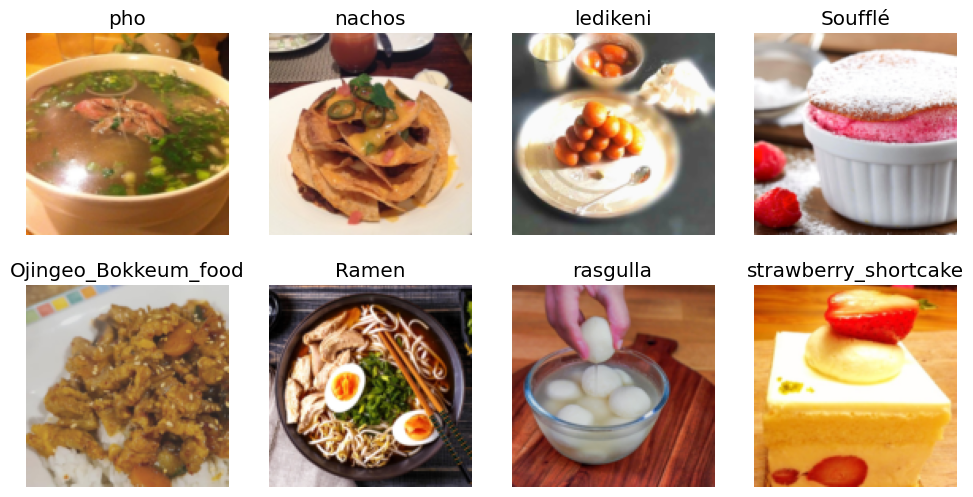

In [12]:
dls.train.show_batch(max_n=8, nrows=2)

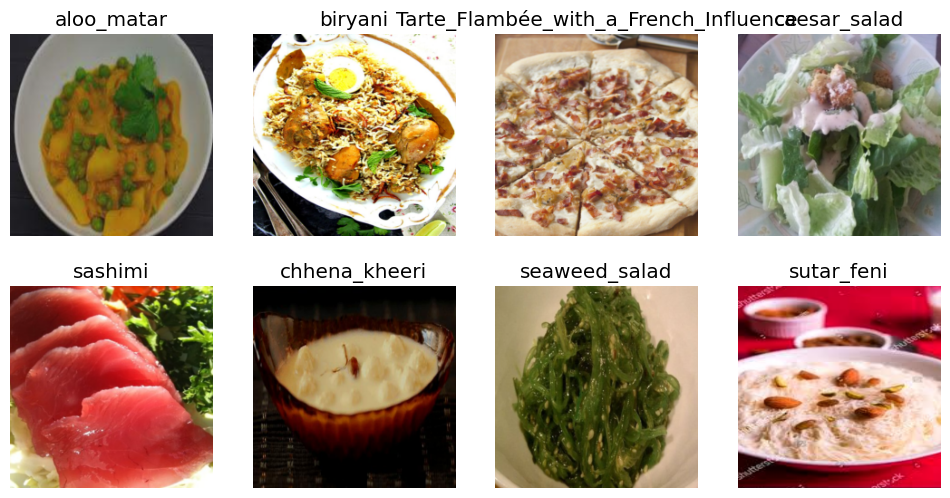

In [95]:
dls.valid.show_batch(max_n=8, nrows=2)

### Data Augmentation

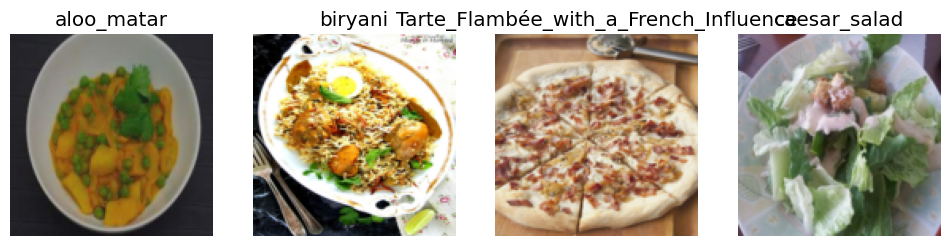

In [16]:
from fastai.vision.augment import aug_transforms

dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Squish), 
                    batch_tfms=aug_transforms(mult=2)) # Applying data augmentation
dls = dblock.dataloaders(data_path, bs=64) # You can adjust the batch size as needed
dls.valid.show_batch(max_n=4, nrows=1)


In [ ]:
# dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Squish)) # Squishing the whole image into (128 x 128) size
# dls = dblock.dataloaders(data_path)
# dls.valid.show_batch(max_n=4, nrows=1)

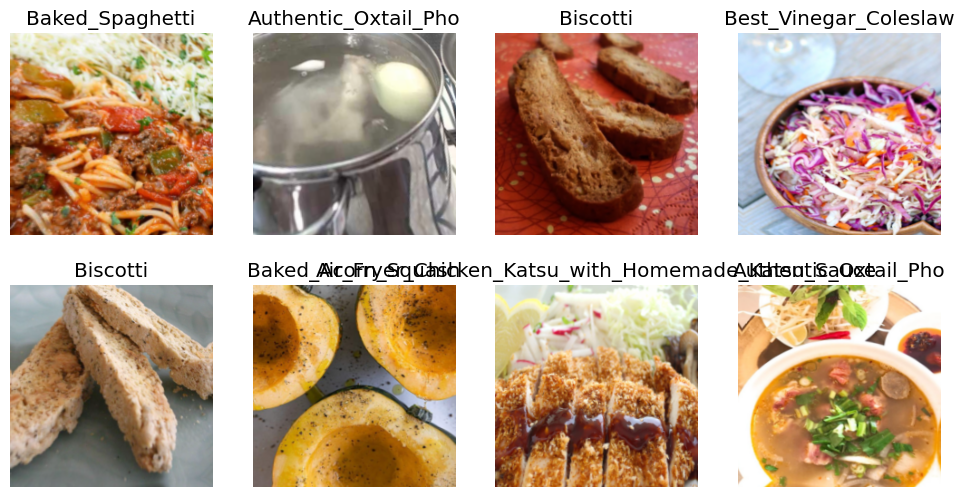

In [17]:
# RandomResizedCrop crops images randomly and create copies so that we don't miss out anything
# aug_transforms is used for image data augmentation
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n=8, nrows=2)

In [18]:
torch.save(dls, "food_dataloader_v0.pkl")

### Training the model

In [22]:
bs = 32 # batch size
version = 0

In [23]:
data_path = "dataset\output"

In [24]:

dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))   

In [25]:
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path, bs = bs, device='cuda')
torch.save(dls, f"food_dataloader_r34_v{version}.pkl")

In [21]:
dls.vocab

['Baden_Brägele_with_Bibliskäs', 'Bibimbap_food', 'Blanquette_de_Veau', 'Boeuf_Bourguignon', 'Bossam_food', 'Bouillabaisse', 'Braised_Beef_Rheinland_style', 'Braunkohl_and_Bregenwurst', 'Budae_Jjigae_food', 'Bulgogi_food', 'Butter_Noodles', 'Cassoulet', 'Chuncheon_Dakgalbi_food', 'Coq_au_Vin', 'Coquilles_Saint_Jacques', 'Crème_brûlée', 'Crêpes', 'Dumplings', 'Döner_with_Curried_Sausage', 'Escargots', 'Fondue_Savoyarde', 'Frankfurter_Green_Sauce', 'German_Bread_Rolls', 'Gimbap_food', 'Gyudon', 'Hamburger_Labskaus', 'Hamburger_Pannfisch', 'Kalguksu_food', 'Kare_raisu', 'Katsudon', 'Kimchi_Jjigae_food', 'Königsberger_Meatballs', 'Manduguk_food', 'Miso_soup', 'Moules_Marinières', 'Ojingeo_Bokkeum_food', 'Okonomiyaki', 'Omurice', 'Onigiri', 'Pajeon_food', 'Pissaladière', 'Pork_Knuckle_with_Sauerkraut', 'Potato_Fritters_or_Potato_Pancakes_Kartoffelpuffer_', 'Potato_Salad', 'Pretzen_from_Bavaria', 'Pumpernickel_from_Lower_Saxony', 'Ramen', 'Salade_niçoise', 'Samgyetang_food', 'Shabu_Shabu', '

In [ ]:
# dls = torch.load(f"food_dataloader_v{version}.pkl")

In [26]:
model_path = "models"

In [27]:
model = vision_learner(dls, resnet34, metrics=[error_rate,accuracy])

c:\Users\sanzh\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\sanzh\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [79]:
import torch

# Check if GPU is available and PyTorch is configured to use it
if torch.cuda.is_available() and torch.cuda.current_device() >= 0:
    device = "GPU"
else:
    device = "CPU"

print(f"Using {device}")


Using GPU


In [28]:
model.fine_tune(5)

In [29]:
model.save(f"food-recognizer-r34-v{version}")

Path('models/food-recognizer-r34-v0.pth')

In [30]:
model.export(f"food-recognizer-r34-v{version}.pkl")

In [ ]:
model.fine_tune(5)

In [39]:
model.save(f"food-recognizer-r34-v{version}")

Path('models/food-recognizer-v0.pth')

### Interp and cleaning

c:\Users\sanzh\Desktop\WorkSpace\Work space\Project Food Critics\myenv\lib\site-packages\fastai\interpret.py:149: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


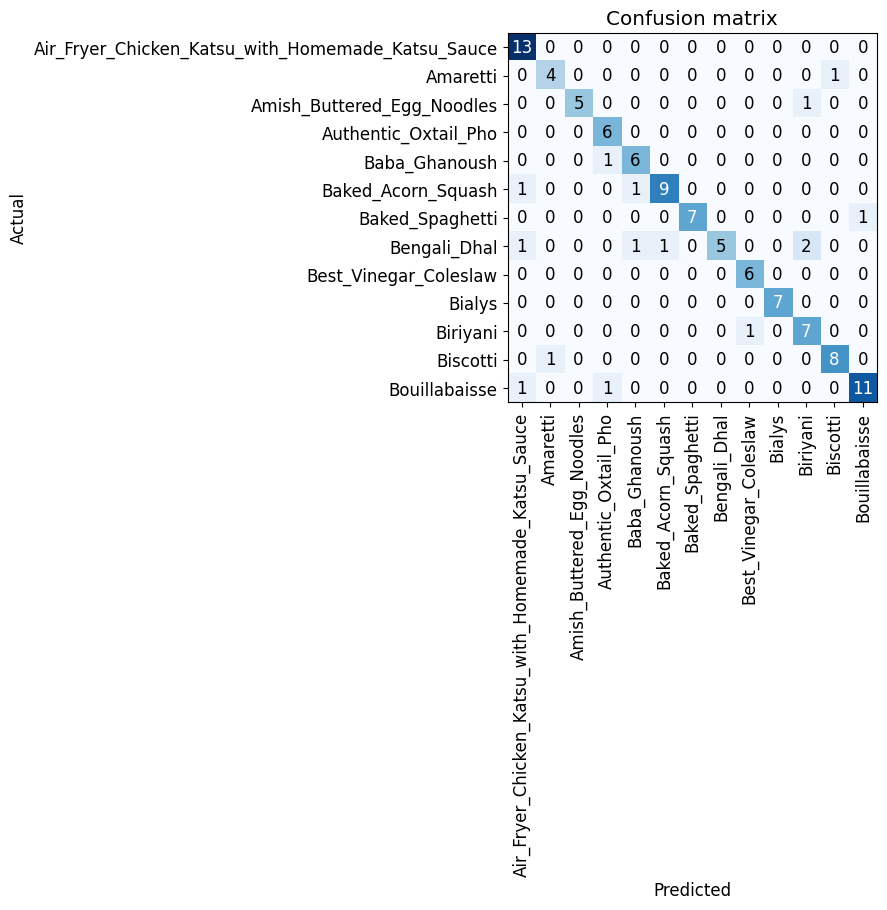

In [40]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

In [ ]:
cleaner = ImageClassifierCleaner(model)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()                                    # delete irrelevant data
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), f"{data_path}/{cat}") # change the directory

In [ ]:
interp.plot_top_losses(9, nrows=3)

# Resnet 50

In [63]:
bs = 32 # batch size
version = 0

In [60]:
data_path = Path('dataset\output')

In [64]:
dblock = DataBlock(
blocks=(ImageBlock, CategoryBlock),
get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
get_y=parent_label,                               # taking the folder name as labels
item_tfms=Resize(128))                            # resizing to get the image of same shape

In [65]:
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path, bs = bs, device='cuda')
torch.save(dls, f"food_dataloader_r50_v{version}.pkl")

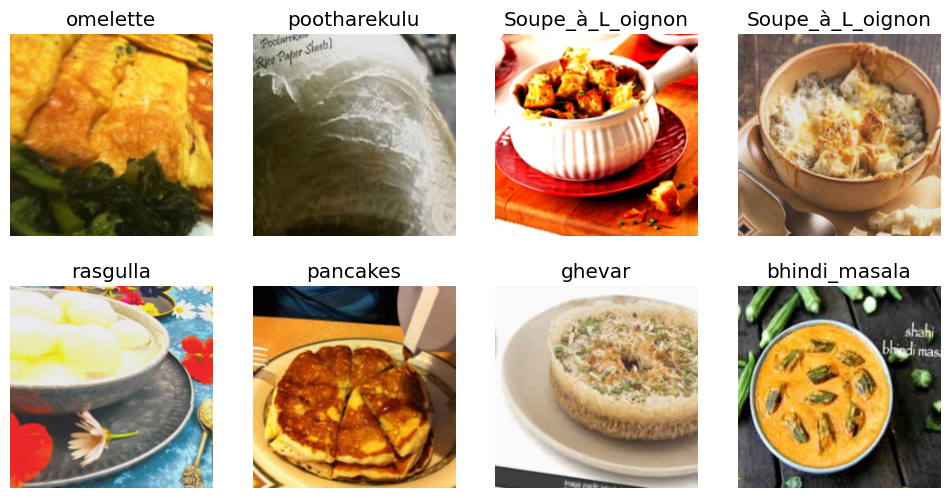

In [66]:
dls.train.show_batch(max_n=8, nrows=2)

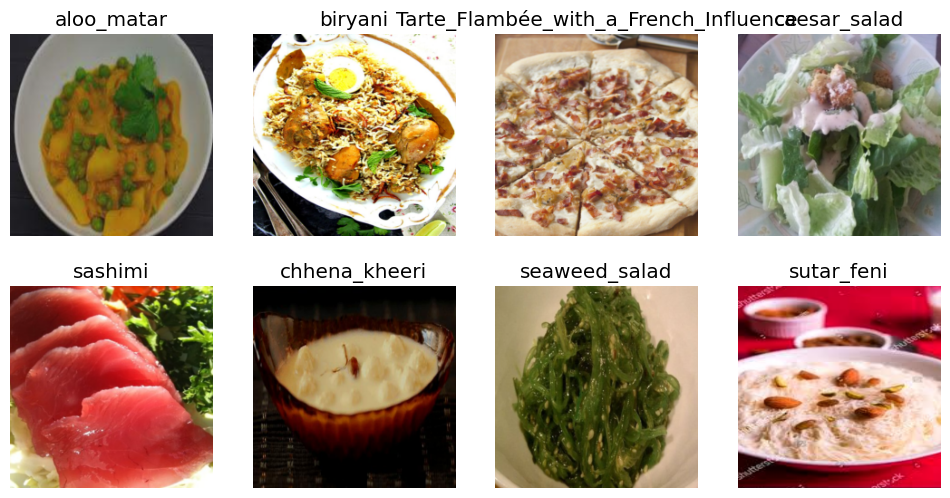

In [68]:
dls.valid.show_batch(max_n=8, nrows=2)

In [69]:
model_path = "models"

In [70]:
model = vision_learner(dls, resnet50, metrics=[error_rate,accuracy])

In [71]:
model.fine_tune(5)

In [72]:
model.save(f"food-recognizer-r50-v{version}")

Path('models/food-recognizer-r50-v0.pth')

In [ ]:
model.export(f"food-recognizer-r50-v{version}.pkl")

# Resnet 152

In [ ]:
bs = 32 # batch size
version = 0

In [ ]:
dblock = DataBlock(
blocks=(ImageBlock, CategoryBlock),
get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
get_y=parent_label,                               # taking the folder name as labels
item_tfms=Resize(128))                            # resizing to get the image of same shape

In [ ]:
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path, bs = bs, device='cuda')
torch.save(dls, f"food_dataloader_v{version}.pkl")

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

In [ ]:
model_path = "models"

In [ ]:
model = vision_learner(dls, resnet34, metrics=[error_rate,accuracy])

In [ ]:
model.fine_tune(5)

In [ ]:
model.save(f"food-recognizer-r152-v{version}")

In [ ]:
model.save(f"food-recognizer-r152-v{version}")

# Export final model

In [ ]:
model.export(f"{model_path}/food-recognizer-v{version}.pkl")

## Inference

In [4]:
version = 0
img_path = 'test'
model_path = f"models/food-recognizer-r50-v{version}.pkl"

In [8]:
model = load_learner(model_path)

### Test 1

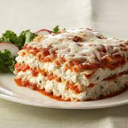

In [5]:
img = Image.open(f'{img_path}/cheese_lasgna.jpg')
img.to_thumb(128,128)

In [9]:
model.predict(f'{img_path}/cheese_lasgna.jpg')

('ghevar',
 tensor(141),
 tensor([3.6235e-03, 2.4468e-07, 2.7861e-03, 2.7439e-05, 7.2301e-05, 1.5015e-04, 1.3847e-04, 5.7937e-03, 2.5643e-05, 1.6495e-03, 7.5570e-05, 1.8657e-04, 3.9738e-05, 7.1311e-06, 1.3035e-03, 2.7862e-05,
         1.6179e-04, 6.5132e-06, 6.2802e-05, 1.0912e-05, 1.7168e-04, 2.1076e-04, 8.0160e-03, 1.8516e-04, 2.9216e-05, 9.6255e-04, 3.7585e-04, 5.0841e-06, 9.1717e-03, 4.1265e-04, 2.0553e-06, 1.1899e-04,
         4.1190e-04, 6.2406e-06, 4.0874e-05, 1.2848e-04, 3.3614e-04, 4.9285e-03, 9.9311e-04, 6.5815e-05, 2.7910e-05, 3.8949e-04, 1.0216e-03, 7.2459e-04, 1.5492e-05, 3.7512e-04, 2.3525e-05, 3.3241e-04,
         1.1826e-05, 1.7417e-05, 1.3416e-04, 1.4508e-03, 2.2187e-03, 1.6657e-03, 6.5766e-05, 3.6872e-03, 1.1648e-02, 7.7590e-06, 3.8828e-04, 3.7618e-03, 4.2436e-04, 3.4430e-04, 7.9771e-05, 1.5425e-04,
         9.1040e-04, 2.3817e-05, 3.0705e-05, 9.7465e-04, 2.6554e-05, 1.2888e-03, 1.5667e-04, 3.8142e-05, 7.7521e-07, 5.9725e-05, 4.9374e-06, 2.1193e-05, 1.4336e-04, 4.6604

### Test 2

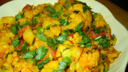

In [10]:
img = Image.open(f'{img_path}/augmented_1.jpg')
img.to_thumb(128,128)

In [11]:
model.predict(f'{img_path}/augmented_1.jpg')

('aloo_gobi',
 tensor(65),
 tensor([7.3211e-08, 3.6183e-13, 2.9946e-14, 1.0139e-10, 4.9212e-13, 3.6931e-12, 1.3845e-11, 2.6293e-11, 3.8578e-14, 8.5746e-12, 7.7607e-10, 2.1573e-10, 6.0178e-11, 8.3264e-11, 3.1219e-13, 4.2124e-11,
         4.6400e-13, 1.4699e-10, 2.1152e-10, 3.0561e-13, 2.1540e-11, 6.7949e-10, 3.4922e-13, 4.2729e-12, 2.4174e-14, 1.3042e-12, 2.8450e-09, 2.2663e-12, 1.2662e-13, 3.4053e-13, 5.0756e-12, 3.4241e-12,
         2.2198e-12, 1.7390e-12, 4.0142e-11, 1.2953e-10, 1.4367e-12, 2.6322e-10, 4.0079e-13, 2.9671e-11, 9.8075e-12, 1.2116e-12, 1.9643e-12, 1.2891e-10, 3.6990e-12, 4.6574e-11, 1.0979e-14, 2.4324e-11,
         2.9319e-13, 5.0245e-12, 1.3337e-11, 3.0142e-11, 2.3171e-13, 7.4590e-13, 4.4176e-14, 3.8192e-13, 1.1156e-11, 1.9200e-09, 1.5582e-12, 8.5774e-12, 1.8016e-12, 5.3766e-12, 1.4366e-11, 1.7561e-10,
         4.6630e-12, 1.0000e+00, 3.1485e-07, 4.1440e-09, 5.6469e-07, 3.4354e-09, 1.0470e-13, 5.6119e-12, 4.4997e-12, 1.8001e-11, 1.5810e-12, 8.0838e-11, 1.5195e-12, 4.01

### Test 3

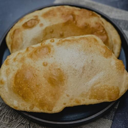

In [12]:
img = Image.open(f'{img_path}/augmented_28.jpg')
img.to_thumb(128,128)

In [13]:
model.predict(f'{img_path}/augmented_28.jpg')

('bhatura',
 tensor(81),
 tensor([1.8205e-08, 6.7636e-11, 2.3785e-11, 9.3451e-10, 1.4992e-10, 8.3275e-09, 2.3937e-10, 9.1143e-12, 2.1356e-10, 2.3677e-08, 1.4323e-10, 4.0452e-10, 9.2070e-10, 5.5663e-10, 5.3364e-10, 2.1669e-11,
         1.1236e-05, 4.1015e-08, 2.4945e-10, 4.4574e-10, 1.2816e-09, 3.4268e-12, 2.3076e-06, 3.0722e-10, 1.1664e-09, 9.8445e-11, 5.1307e-10, 1.4858e-11, 5.5816e-11, 2.9170e-11, 9.9508e-10, 3.5942e-10,
         5.7217e-08, 2.2373e-09, 5.2678e-08, 7.2680e-11, 2.8505e-11, 1.5591e-08, 9.2904e-10, 8.5991e-11, 7.4776e-11, 2.7341e-11, 1.6959e-09, 7.9534e-11, 2.6758e-10, 3.4613e-12, 3.2201e-12, 8.7861e-11,
         7.0954e-09, 2.0732e-11, 1.2027e-09, 1.7055e-07, 6.7381e-10, 3.3154e-09, 8.7125e-10, 2.2642e-10, 3.8311e-09, 6.6828e-11, 1.7831e-08, 6.5740e-09, 3.7108e-09, 7.6389e-10, 2.3889e-10, 3.2421e-09,
         2.4240e-08, 1.0005e-10, 1.8324e-08, 5.2637e-09, 1.6902e-10, 7.7923e-11, 2.0576e-10, 1.3650e-08, 3.7572e-10, 1.0570e-11, 2.2649e-11, 3.8449e-13, 4.0112e-11, 2.0746

### Test 4

In [ ]:
img = Image.open(f'{img_path}/image-04.jpg')
img.to_thumb(128,128)

In [ ]:
model.predict(f'{img_path}/image-04.jpg')

### Test 5

In [ ]:
img = Image.open(f'{img_path}/image-05.jpg')
img.to_thumb(128,128)

In [ ]:
model.predict(f'{img_path}/image-05.jpg')

### Test 6

In [ ]:
img = Image.open(f'{img_path}/image-06.jpg')
img.to_thumb(128,128)

In [ ]:
model.predict(f'{img_path}/image-06.jpg')